In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
df=pd.read_csv('dataset/fifa_0310.csv',index_col=0)

## df.isnull().sum()

In [4]:
# 파생변수 1 Position_Class
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM',
                                                   'RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB',
                                                  'LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [6]:
df['Special_psc']=df.Potential+df.Special+df.Composure

In [7]:
df.drop([ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Loaned', 'Age_C', 'Over_C', 'Special_psc'],
      dtype='object')

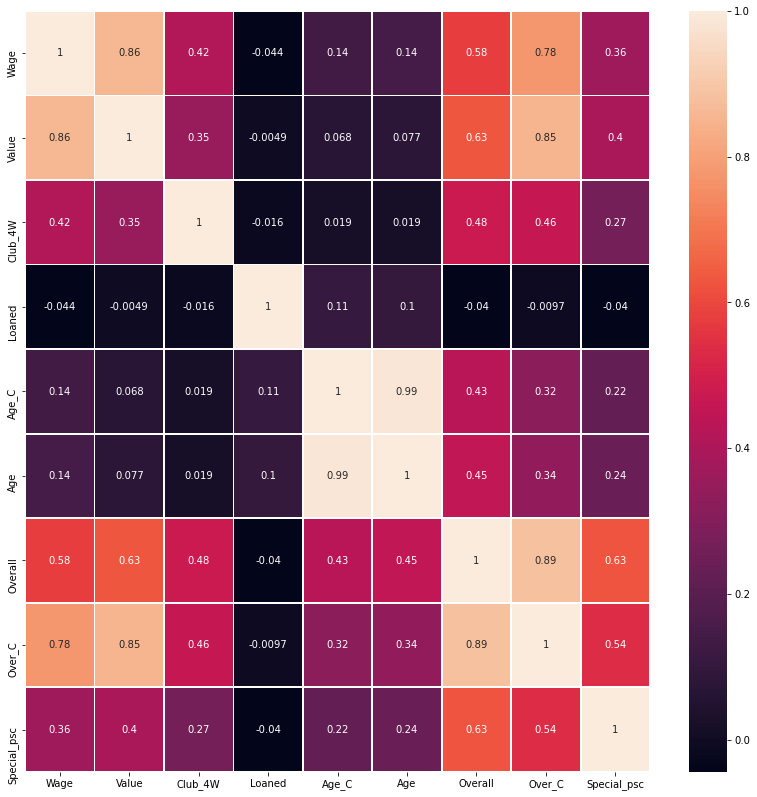

In [35]:
df1=df[['Wage','Value','Club_4W','Position_Class','Loaned', 'Age_C','Age', 'Overall', 'Over_C', 'Special_psc']]
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) 

In [50]:
df35=df1[['Age', 'Overall', 'Special_psc']]

In [52]:
df35.Special_pcs=df35.Special_pcs.astype(int)

AttributeError: 'DataFrame' object has no attribute 'Special_pcs'

In [44]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean=df[col].mean()
        series_std=df[col].std
        df[col] = df[col].apply(lambda x: (x-series_mean/series_std))
    return df

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3)
scaled=scaler.transform(df3)
scaled

array([[ 1.2608425 ,  4.00678288,  2.3365688 ],
       [ 1.68862793,  4.00678288,  2.42455479],
       [ 0.19137895,  3.71814303,  2.11836355],
       ...,
       [-1.94754817, -2.77625373, -1.51721744],
       [-1.73365546, -2.77625373, -1.36588154],
       [-1.94754817, -2.92057366, -1.04913199]])

In [53]:
df55=pd.DataFrame(scaled, columns=['Age', 'Overall', 'Special_psc'])

In [54]:
df55.head()

,Age,Overall,Special_psc
0,1.260843,4.006783,2.336569
1,1.688628,4.006783,2.424555
2,0.191379,3.718143,2.118364
3,0.405272,3.573823,-0.338205
4,0.405272,3.573823,2.579410


In [59]:
ddf=pd.concat([df1,df55], axis=1)

In [60]:
ddf.head()

,Wage,Value,Club_4W,Position_Class,Loaned,Age_C,Age,Overall,Over_C,Special_psc,Age,Overall,Special_psc
0,565.0,110500.0,3.0,Forward,1.0,6.0,31.0,94.0,18.0,2392.0,1.260843,4.006783,2.336569
1,405.0,77000.0,3.0,Forward,1.0,7.0,33.0,94.0,18.0,2417.0,1.688628,4.006783,2.424555
2,290.0,118500.0,3.0,Forward,1.0,4.0,26.0,92.0,17.0,2330.0,0.191379,3.718143,2.118364
3,260.0,72000.0,3.0,GoalKeeper,1.0,5.0,27.0,91.0,16.0,1632.0,0.405272,3.573823,-0.338205
4,355.0,102000.0,3.0,Midfielder,1.0,5.0,27.0,91.0,16.0,2461.0,0.405272,3.573823,2.579410


In [69]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wage            17918 non-null  float64
 1   Value           17918 non-null  float64
 2   Club_4W         17918 non-null  float64
 3   Position_Class  17918 non-null  object 
 4   Loaned          17918 non-null  float64
 5   Age_C           17918 non-null  float64
 6   Age             17918 non-null  float64
 7   Overall         17918 non-null  float64
 8   Over_C          17918 non-null  float64
 9   Special_psc     17918 non-null  float64
 10  Age             17918 non-null  float64
 11  Overall         17918 non-null  float64
 12  Special_psc     17918 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.9+ MB


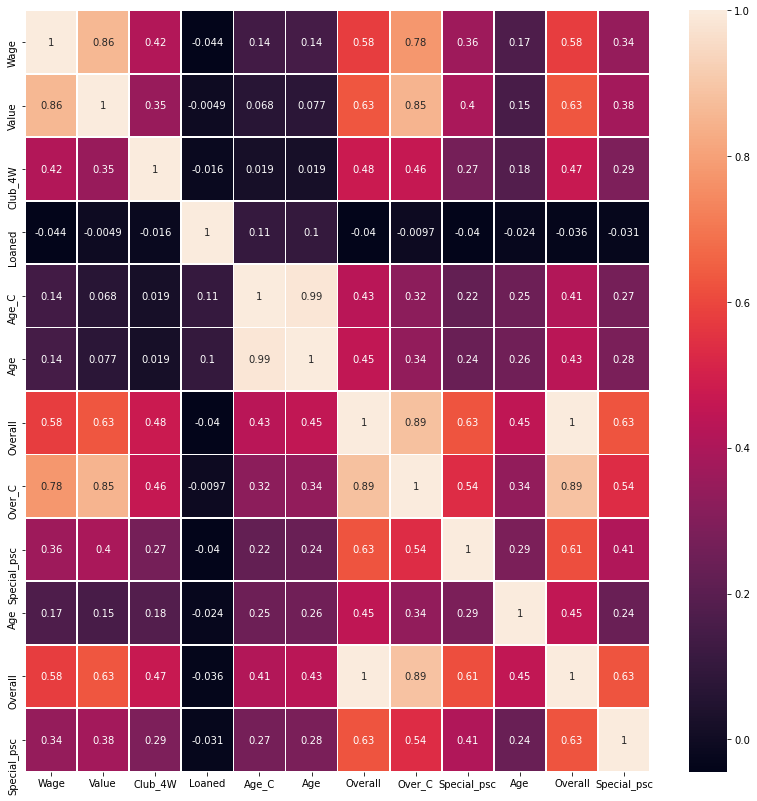

In [74]:
plt.figure(figsize=(14,14))
sns.heatmap(ddf.corr(),linewidths=.8, annot=True) 

In [72]:
# Position 실수화
ddf['Position_Class'].replace({'Forward':3, 'Midfielder':2, 'Defender':1, 'GoalKeeper':0}, inplace = True) # 숫자를 바꾸면 상관관계의 부호가 달라진다???

In [73]:
ddf['Position_Class']

0           Forward
1           Forward
2           Forward
3        GoalKeeper
4        Midfielder
            ...    
18202    Midfielder
18203       Forward
18204       Forward
18205       Forward
18206    Midfielder
Name: Position_Class, Length: 18207, dtype: object

In [75]:
ddf.columns

Index(['Wage', 'Value', 'Club_4W', 'Position_Class', 'Loaned', 'Age_C', 'Age',
       'Overall', 'Over_C', 'Special_psc', 'Age', 'Overall', 'Special_psc'],
      dtype='object')

In [83]:
lm_fifa2=smf.ols('Wage~ Value+Club_4W+Over_C+Special_psc', data=ddf).fit()
lm_fifa2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        06:15:42   Log-Likelihood:                -67381.
No. Observations:               17629   AIC:                         1.348e+05
Df Residuals:                   17623   BIC:                         1.348e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.8055      0.590     -6.452      0.000      -4.962      -2.649
Value              0.0028   2.88e-05     96.816      0.000       0.003       0.003
Club_4W            2.1527      0.084     25.602      0.000       1.988       2.318
Over_C             2.0666      0.123     16.832      0.000       1.826       2.307
Special_psc[0]    -0.0009      0.000     -2.534      0.011      -0.002      -0.000
Special_psc[1]    -0.6322      0.102     -6.216      0.000      -0.832      -0.433
==============================================================================
Omnibus:                    13710.278   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2610024.188
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      62.334   Cond. No.                     4.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""